In [56]:
import numpy as np 
import matplotlib.pyplot as plt
from sympy import * 
import scipy.optimize as optimize
import sympy as sp

verify kinetic of MD-state, compare the displacement of track with theory

experiment data as follow, track displacement vs. P

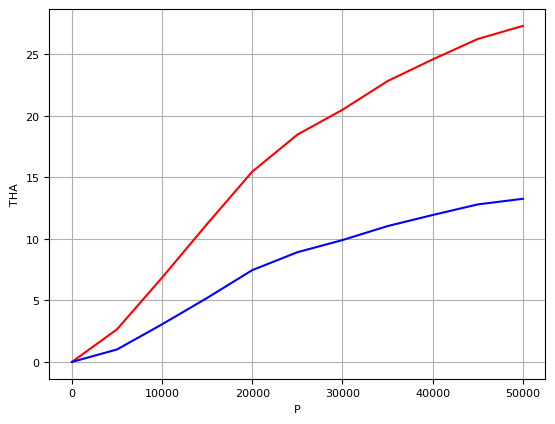

In [57]:
P_ex = np.array([0.0,5.0,10.0,15.0,20.0,25.0,30.0,35.0,40.0,45.0,50.0])*1000

angle1_ex = np.array([9.95,16.61,27.54,34.94,47.19,53.78,59.33,64.96,67.04,72.83,77.03])-9.95
angle2_ex = np.array([10.00,16.93,25.80,37.17,47.08,54.89,60.93,65.36,71.26,73.49,76.34])-10.00
angle3_ex = np.array([10,15.65,26.33,39.20,47.83,55.21,58.28,65.11,69.92,73.93,74.56])-10
angle_ex = (angle1_ex + angle2_ex + angle3_ex)/3

dis1_ex = np.array([-9.89,-8.81,-6.60,-5.22,-2.42,-1.11,0.02,1.18,1.58,2.93,3.69])+9.89
dis2_ex = np.array([-9.33,-8.14,-6.40,-4.02,-1.88,-0.36,0.96,1.80,3.08,3.50,4.06])+9.33
dis3_ex = np.array([-9.89,-9.12,-6.93,-4.26,-2.43,-0.90,-0.39,1.02,2.04,2.85,2.90])+9.89
dis_ex = (dis1_ex + dis2_ex + dis3_ex)/3

plt.plot(P_ex,angle_ex/180*pi*23.7,'r')
plt.plot(P_ex,dis_ex,'b')

plt.xlabel('P')
plt.ylabel('THA')
plt.grid()
plt.show()

theorical data, new model for p vs angle, but first need to consider angle vs. displacement and volume for OT-SPA

In [58]:
Kt = 0.146
c = 122.5979
d = 0.502
a = 18.84*0.001
h0 = 32*0.001
phi = sp.symbols('phi',real = True)
p = sp.symbols('p',real = True)
F = sp.symbols('F', real = True)
u = h0 - sp.sqrt(a*a+h0*h0-4*a*a*sp.sin(np.pi/6+phi/2)*sp.sin(np.pi/6+phi/2))

# ang = np.linspace(0,np.pi/3,100)
# print(ang.shape)
# uu = np.zeros_like(ang)
# for i in range(ang.shape[0]):
#     uu[i] = u.subs({phi:ang[i]}).evalf()

# plt.plot(ang,uu)

# du_dphi = sp.diff(u,phi)
# print(du_dphi)
U = 0.5*Kt*phi*phi + c*u**(d+1)/(d+1)
Te = Kt*phi + a*a*c*(h0-sp.sqrt(a*a+h0*h0-4*a*a*sp.sin(np.pi/6+phi/2)*sp.sin(np.pi/6+phi/2)))**d*(a*a+h0*h0-4*a*a*sp.sin(np.pi/6+phi/2))**(-0.5)*sp.sin(np.pi/3+phi)
dU_dphi = sp.diff(U,phi)
# print(dU_dphi)
MQh = sp.Matrix([a*(sp.cos(phi + np.pi/3) - 1), a*sp.sin(phi + np.pi/3), h0-u])
MRh = sp.Matrix([a*(sp.cos(phi + 2*np.pi/3) - 1), a*sp.sin(phi + 2*np.pi/3), h0-u])
MGh = sp.Matrix([-a, 0, (h0-u)/2])
MPh = sp.Matrix([a*(np.cos(np.pi/3) - 1), a*np.sin(np.pi/3), 0])

V1 = sp.Abs(MQh.cross(MRh).dot(MGh))
V2 = sp.Abs(MPh.cross(MRh).dot(MGh))
V3 = np.sqrt(3) /2 * (h0 - u) *a**2
V = V1 + V2 + V3 - (18.84*36.95*0.001*0.001*-np.cos(104.48*np.pi/180)*6*1.5*0.001)

dV_dphi = sp.diff(V,phi)
equation = p*dV_dphi - dU_dphi 
equation_md_P_phi = dU_dphi / dV_dphi

Text(0, 0.5, 'angle')

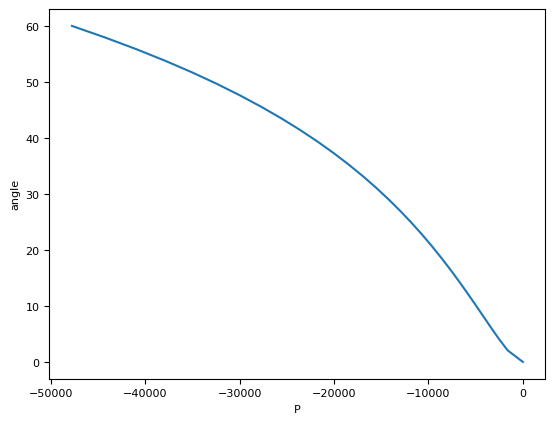

In [59]:
n_a = 30
ang = np.linspace(0 , np.pi/3-0.0001, n_a)
P_theory = []
for an in range(n_a):
    P_theory.append(equation_md_P_phi.subs({phi: ang[an]}).evalf())
P_theory = np.asarray(P_theory)
plt.plot(P_theory, ang * 180 / np.pi)
plt.xlabel('P')
plt.ylabel('angle')

Put above together,angle and dis,angle's difference is big, however, the dis of track seems ok.

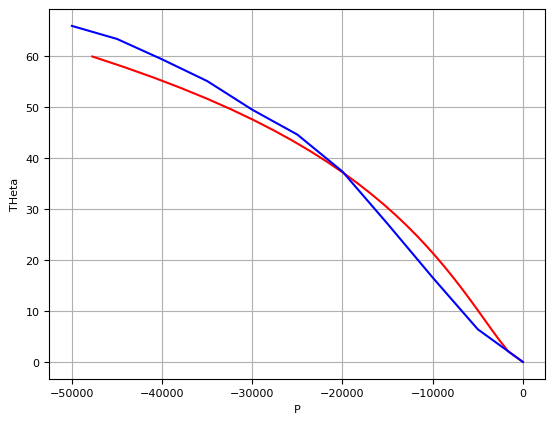

In [60]:
r = 23.7 # min MAE->0.23

plt.plot(P_theory, ang * 180 / np.pi, color="r")
plt.plot(-P_ex,angle_ex, color="b")
plt.xlabel('P')
plt.ylabel('THeta')
plt.grid()
plt.show()

<Figure size 640x480 with 0 Axes>

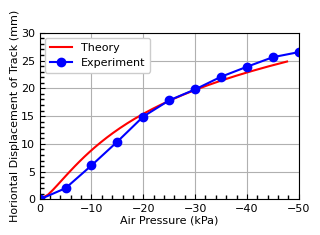

In [61]:

plt.rcParams["font.family"] = "Times New Roman"
plt.tight_layout()
plt.figure(figsize=(8.49/2.54, 5.5/2.54))
#plt.plot(P_t, angle_t*pi/180*r,'r',label = 'Theory')
plt.plot(P_theory / 1000, ang  * r,'r',label = 'Theory')
plt.plot(-P_ex / 1000,2*dis_ex,'o-b',label = 'Experiment')
plt.minorticks_on()
plt.tick_params(axis="both", which="minor", direction="in", width=1, length=3)
plt.tick_params(\
    axis='x',#设置x轴
    direction='in',# 小坐标方向，in、out
    which='both',      # 主标尺和小标尺一起显示，major、minor、both
    bottom=True,      #底部标尺打开
    top=False,         #上部标尺关闭
    labelbottom=True #x轴标签打开
    ) 
plt.tick_params(\
    axis='y',
    direction='in',
    which='both',
    left=True,
    right=False,
    labelbottom=True
    )
# plt.tick_params(labelsize=8)

plt.legend(title='', loc='upper left', framealpha=1)
plt.rcParams.update({'font.size':8})
plt.xlabel('Air Pressure (kPa)',labelpad=0.5)
plt.ylabel('Horiontal Displacement of Track (mm)',labelpad=0.5)
plt.grid()
plt.ylim(0,30)
plt.xlim(0, -50)

plt.savefig('Track dis-P-verify.svg',format = "svg", dpi= 300)

plt.show()

(0.0, 13.0)

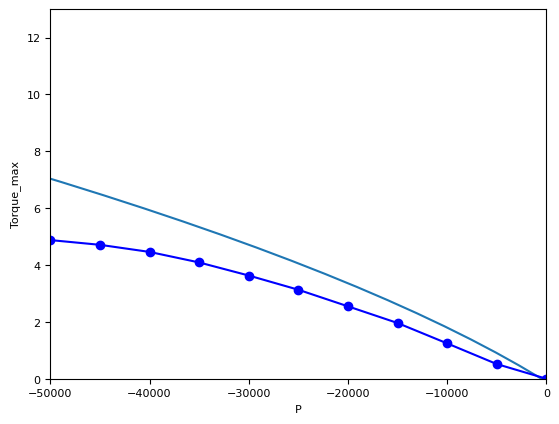

In [78]:
T_max_theory = []
n_p = 80
P_theory = np.linspace(0, -50000 , n_p)
for i in range(n_p):
    T_max_theory.append(equation.subs({phi: 0, p:P_theory[i]}).evalf())
    P_theory[i] += -5.94e+05 * T_max_theory[i]**2 - 1.399e+05 * T_max_theory[i] - 485.6
T_max_theory = np.asarray(T_max_theory)

plt.plot(P_theory, T_max_theory / (r / 1000))

P_ex = np.array([0.0,5.0,10.0,15.0,20.0,25.0,30.0,35.0,40.0,45,50])*1000

force1_ex = np.array([0,0.50,1.25,1.98,2.51,3.1,3.63,4.08,4.51,4.80,5.00])
# back 4, Fi = 0.11
force2_ex= np.array([0,0.50,1.25,1.94,2.52,3.10,3.55,4.00,4.41,4.67,4.85])
# back 3, Fi = 0.11
force3_ex = np.array([0,0.55,1.23,1.96,2.61,3.19,3.71,4.19,4.46,4.66,4.78])

force_ex = (force1_ex + force2_ex + force3_ex)/3

plt.plot(-P_ex, force_ex, 'o-b')
plt.xlabel("P")
plt.ylabel("Torque_max")
plt.xlim([-50000, 0])
plt.ylim([0, 13])

displacement of tank,experimental data

In [ ]:
tank_P_ex = np.array([20,25,30,35,40])*1000

tank_dis_ex = np.array([(3.4+3.45+3.45+3.7+3.65)/5, (5.3+5.45+5.5+5.4+4.9)/5, (6.4+7.15+6.45+6.8+6.35)/5,
(8.68+7.65+8.4+7.7+8.3)/5, (8.15+8.2+8.25+8.4+8.15)/5]) # load = 0g



In [ ]:
tank_dis_th = 3*2*r*np.array(phi)[0:len(phi)-1]/10

In [ ]:
plt.rcParams["font.family"] = "Times New Roman"
plt.tight_layout()

plt.figure(figsize=(8.49/2.54,6.0/2.54))
plt.plot((np.array(Pf2)+reP2-Pini2)/1000, tank_dis_th,'r',label = 'Theory with 8.2N Load')
#plt.plot(-np.array(P3), tank_dis_th,'g',label = 'theory-noload')

plt.plot(-tank_P_ex/1000,tank_dis_ex,'o-b',label = 'Experiment')


plt.minorticks_on()
plt.tick_params(axis="both", which="minor", direction="in", width=1, length=3)
plt.tick_params(\
    axis='x',#设置x轴
    direction='in',# 小坐标方向，in、out
    which='both',      # 主标尺和小标尺一起显示，major、minor、both
    bottom=True,      #底部标尺打开
    top=False,         #上部标尺关闭
    labelbottom=True #x轴标签打开
    ) 
plt.tick_params(\
    axis='y',
    direction='in',
    which='both',
    left=True,
    right=False,
    labelbottom=True
    )
plt.rcParams.update({'font.size':8})
plt.legend(title='', loc='upper left', framealpha=1)
plt.xlabel('Air Pressure (Pa)',labelpad=0.5)
plt.ylabel('Horiontal Displacement of SR-Tank (cm)',labelpad=0.5)
plt.grid()
plt.autoscale(tight = True)

# plt.grid(linestyle='--')
plt.ylim(3.4,10.5)
plt.xlim(-20, -40)
plt.savefig('Tank dis-P-verify.svg',format = "svg",dpi=300)

plt.show()

Car kinetic verify, including turing angle and radius in 3 cycles, without load, verify

experimental data of turing angle and radius in 3 cycles, without load

In [ ]:
# turing angle
P1_ex = np.array([25,30,35,40])*1000

turing_angle_ex = np.array([(5.7509+6.1176+6.2746+6.6507+6.2823)/5, (9.5207+ 10.0542+8.9791+8.4335+9.5371)/5,
(11.6489+12.2345+12.4613+11.4276+ 12.6046)/5, (13.2829+13.7613+13.5656+12.9839+13.4273)/5])
print(turing_angle_ex)

turing_radius_ex = np.array([ (36.3993+34.8109+35.1265+34.7021+34.9138)/5, (34.3450+33.6550+36.0608+34.9045+34.4092)/5,
(34.9741+35.8409+34.7223+34.1635+35.6250)/5, (33.7201+34.1091+36.0720+36.1742+35.1294)/5])


theortical data, use dis of track as arc length, the turing radius is the length from the center of track(the turing center) to the outside of the other track, where the front wheel set. 
turing angle is simply arc length/turing radius



In [ ]:
cycle = 3

turing_radius_th = np.sqrt(27.25**2+10.256**2)
print(turing_radius_th)

arc_length = np.array(phi)[0:len(phi)-1]*(r/10)*cycle*2
print(arc_length)

turing_angle_th = arc_length/(1*turing_radius_th)*(180/pi)

print(turing_angle_th)



put it together, both diff are pretty big, because of effct of pitch radius, acr length, and fiction from internal, fiction from ground 

In [ ]:
plt.figure(figsize=(8.49/2.54, 4.5/2.54))


plt.plot((np.array(Pf2)+reP2-Pini2)/1000, turing_angle_th,'r',label = 'Theory')
plt.plot(-P1_ex/1000,turing_angle_ex,'o-b',label = 'Experiment')
plt.legend(title='', loc='lower right', framealpha=1)
plt.xlabel('Air Pressure (Pa)',labelpad=0.5)
plt.ylabel('Turing Angle of SR-Tank ($^\circ$)',labelpad=0.5)
plt.rcParams["font.family"] = "Times New Roman"
plt.tight_layout()
plt.minorticks_on()
plt.tick_params(axis="both", which="minor", direction="in", width=1, length=3)
plt.tick_params(\
    axis='x',#设置x轴
    direction='in',# 小坐标方向，in、out
    which='both',      # 主标尺和小标尺一起显示，major、minor、both
    bottom=True,      #底部标尺打开
    top=False,         #上部标尺关闭
    labelbottom=True #x轴标签打开
    ) 
plt.tick_params(\
    axis='y',
    direction='in',
    which='both',
    left=True,
    right=False,
    labelbottom=True
    )
plt.rcParams.update({'font.size':8})



plt.grid()
plt.xlim(-25, -40)
plt.ylim(0, 21.0)

plt.savefig('Turing Angle-P-verify.svg',format = "svg",dpi=300)

plt.show()

In [ ]:
turing_radius_th_arr = np.ones(4)*turing_radius_th

plt.figure(figsize=(8.49/2.54, 4.3/2.54))

plt.plot(-P1_ex/1000, turing_radius_th_arr,'r',label = 'Theory')
plt.plot(-P1_ex/1000,turing_radius_ex,'o-b',label = 'Experiment')
plt.legend(title='', loc='upper left', framealpha=1)
plt.xlabel('Air Pressure (kPa)',labelpad=0.5)
plt.ylabel('Turing Radius of SR-Tank (cm)',labelpad=0.5)
plt.grid()
plt.rcParams["font.family"] = "Times New Roman"

plt.minorticks_on()
plt.tick_params(axis="both", which="minor", direction="in", width=1, length=3)
plt.tick_params(\
    axis='x',#设置x轴
    direction='in',# 小坐标方向，in、out
    which='both',      # 主标尺和小标尺一起显示，major、minor、both
    bottom=True,      #底部标尺打开
    top=False,         #上部标尺关闭
    labelbottom=True #x轴标签打开
    ) 
plt.tick_params(\
    axis='y',
    direction='in',
    which='both',
    left=True,
    right=False,
    labelbottom=True
    )
plt.rcParams.update({'font.size':8})

plt.xlim(-25, -40)
plt.ylim(25, 60)


plt.tight_layout()
# plt.autoscale(tight='True')
plt.savefig('Turing Radius-P-verify.svg',format = "svg",dpi=300)

plt.show()

gamma parameter fitting, gamma is the parameter determined by both the ground fiction and load when SR-Tank is turning around. We use first two experiment data to fit gamma, then use rest three experiment data to verify.

In [ ]:
#gamma is :

print(36/turing_radius_th)

In [ ]:
def fitting_goodness(y, y_fit):
    mean = np.mean(y)  # 1.y mean
    ss_tot = np.sum((y - mean) ** 2)  # 2.total sum of squares
    ss_res = np.sum((y - y_fit) ** 2)  # 3.residual sum of squares
    r_squared = 1 - (ss_res / ss_tot)  # 4.r squared
    return r_squared

In [ ]:
turing_angle_ex1 = np.array([(5.7509+6.1176)/2, (9.5207+10.0542)/2,(11.6489+12.2345)/2, (13.2829+13.7613)/2])/180*pi
OA = 27.25
l = 10.256
dis1_ex1 = np.array([-1.11,0.02,1.18,1.58])+9.89
dis2_ex1 = np.array([-0.36,0.96,1.80,3.08])+9.33
dis_ex1 = ((dis1_ex1+dis2_ex1)/2)*6/10
print(dis_ex1)

In [ ]:

def target_func(x, gamma,b):
    return x/np.sqrt((gamma*OA)**2+l**2)+b

para, cov = optimize.curve_fit(target_func, dis_ex1, turing_angle_ex1)
a=para[0]
b=para[1]
print(a)
print(b)


plt.scatter(dis_ex1,turing_angle_ex1)
#plt.plot(dis_ex1/(1.1834129750393416*turing_radius_th))
plt.plot(dis_ex1,dis_ex1/np.sqrt((a*OA)**2+l**2)+b)


In [ ]:
cycle = 3

turing_radius_th = np.sqrt(27.25**2+10.256**2)
print(turing_radius_th)

arc_length_f = np.array(phi)[0:len(phi)-1]*(r/10)*cycle*2
print(arc_length_f)

turing_angle_th_f = arc_length_f/(1.2020835337712303*turing_radius_th)*(180/np.pi)
#turing_angle_th_f = arc_length_f/(np.sqrt((a*OA)**2+l**2)+b)*(180/np.pi)

print(turing_angle_th_f)

In [ ]:
turing_angle_ex_f = np.array([(6.2746+6.6507+6.2823)/3, (8.9791+8.4335+9.5371)/3,
(12.4613+11.4276+ 12.6046)/3, (13.5656+12.9839+13.4273)/3])

In [ ]:
plt.figure(figsize=(8.49/2.54,4.5/2.54))

plt.plot((np.array(Pf2)+reP2-Pini2)/1000, turing_angle_th_f,'r',label = 'Theory')
plt.plot(-P1_ex/1000,turing_angle_ex_f,'o-b',label = 'Experiment')
plt.legend(title='', loc='lower right', framealpha=1)
plt.xlabel('Air Pressure (kPa)',labelpad=0.5)
plt.ylabel('Turing angle of SR-Tank (°)',labelpad=0.5)
plt.grid()
plt.rcParams["font.family"] = "Times New Roman"

plt.minorticks_on()
plt.tick_params(axis="both", which="minor", direction="in", width=1, length=3)
plt.tick_params(\
    axis='x',#设置x轴
    direction='in',# 小坐标方向，in、out
    which='both',      # 主标尺和小标尺一起显示，major、minor、both
    bottom=True,      #底部标尺打开
    top=False,         #上部标尺关闭
    labelbottom=True #x轴标签打开
    ) 
plt.tick_params(\
    axis='y',
    direction='in',
    which='both',
    left=True,
    right=False,
    labelbottom=True
    )
plt.rcParams.update({'font.size':8})
plt.xlim(-25, -40)
plt.ylim(0, 20)
plt.tight_layout()
plt.savefig('Turing angle-P-verify-with_Gamma.svg',format = "svg",dpi=300)


plt.show()